In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
%matplotlib inline

In [2]:
def read_logs(file, use_scale_correction = True, use_bs_correction = True):
    #use correction because log files may have learning rates scaled off by a factor of S
    #use_bs_correction: log files report the final batch in an epoch with a smaller batch (80) so remove that one
    
    lines = os.popen('grep \'Sum of Var of Grad Noise\' '+file).read().split('\n')
    learning_rates = [float(l.split()[2][:-1]) for l in lines[:-1]]
    grad_var = [float(l.split()[9]) for l in lines[:-1]]
    
    learning_rates = np.array(learning_rates)
    grad_var = np.array(grad_var)
    
    if use_scale_correction:
        number_of_repeats = int(len(learning_rates) / 10)
        batch_sizes = np.tile(np.append(np.repeat(128, 9), 50000 % 128), number_of_repeats)
        learning_rates *= batch_sizes
        
    if use_bs_correction:
        learning_rates[range(9, len(learning_rates), 10)] = float('nan')
        
        
        
    return learning_rates, grad_var

In [3]:
prn_scratch = '/home/wesley/Desktop/nfs01_tesla/swa_uncertainties/grad_cov/prn110_scratch_0120//log.out'
prn_swag = '/home/wesley/Desktop/nfs01_tesla/swa_uncertainties/grad_cov/prn110_swa_0120//log.out'

In [4]:
prn_scratch_lr, prn_scratch_grad = read_logs(prn_scratch, use_scale_correction=False)
prn_swag_lr, prn_swag_grad = read_logs(prn_swag, use_scale_correction=False)


In [5]:
vgg_scratch = '/home/wesley/Desktop/nfs01_tesla/swa_uncertainties/grad_cov/vgg16_scratch_0120/log.out'
vgg_swag = '/home/wesley/Desktop/nfs01_tesla/swa_uncertainties/grad_cov/vgg16_swa_0120/log.out'

vgg_scratch_lr, vgg_scratch_grad = read_logs(vgg_scratch, use_scale_correction=False)
vgg_swag_lr, vgg_swag_grad = read_logs(vgg_swag, use_scale_correction=False)

In [6]:
len(vgg_swag_lr)

490

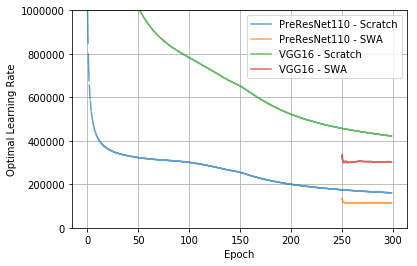

In [7]:
plt.plot(np.arange(0, 299, 0.1), prn_scratch_lr, label = 'PreResNet110 - Scratch', alpha = 0.7)
plt.plot(np.arange(250, 299, 0.1), prn_swag_lr, label = 'PreResNet110 - SWA', alpha = 0.7)

plt.plot(np.arange(0, 299, 0.1), vgg_scratch_lr, label = 'VGG16 - Scratch', alpha = 0.7)
plt.plot(np.arange(250, 299, 0.1), vgg_swag_lr, label = 'VGG16 - SWA', alpha = 0.7)

plt.ylim((0,1e6))
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Optimal Learning Rate')
plt.legend()
plt.savefig('/home/wesley/Documents/Papers/udl_paper_source/icml/plots/pics/c100_lrplot.pdf')

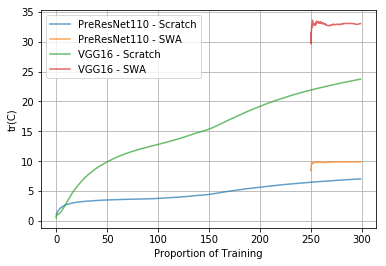

In [8]:
plt.plot(np.arange(0, 299, 0.1), prn_scratch_grad, label = 'PreResNet110 - Scratch', alpha = 0.7)
plt.plot(np.arange(250, 299, 0.1), prn_swag_grad, label = 'PreResNet110 - SWA ', alpha = 0.7)

plt.plot(np.arange(0, 299, 0.1), vgg_scratch_grad, label = 'VGG16 - Scratch', alpha = 0.7)
plt.plot(np.arange(250, 299, 0.1), vgg_swag_grad, label = 'VGG16 - SWA', alpha = 0.7)

plt.legend(loc='upper left')
plt.grid()
plt.xlabel('Proportion of Training')
plt.ylabel('tr(C)')
plt.savefig('/home/wesley/Documents/Papers/udl_paper_source/icml/plots/pics/c100_gradnorm.pdf')

In [9]:
vgg_scratch_dict = {'grad': vgg_scratch_grad, 'lr': vgg_scratch_lr, 'yaxis': np.arange(0, 299, 0.1)}
vgg_180_dict = {'grad': vgg_swag_grad, 'lr': vgg_swag_lr, 'yaxis': np.arange(250, 299, 0.1)}

prn_scratch_dict = {'grad': prn_scratch_grad, 'lr': prn_scratch_lr, 'yaxis': np.arange(0, 299, 0.1)}
prn_180_dict = {'grad': prn_swag_grad, 'lr': prn_swag_lr, 'yaxis': np.arange(280, 299, 0.1)}

In [10]:
np.savez(file='/home/wesley/Documents/Papers/udl_paper_source/icml/plots/data/grad_cov_results.npz', vgg_scratch_dict=vgg_scratch_dict, vgg_swa_dict=vgg_180_dict, 
         prn_scratch_dict=prn_scratch_dict, prn_swa_dict=prn_180_dict)